In [1]:
import numpy as np
import matplotlib.pyplot as plt
from KMCLib import *

# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot

from KMCAnalysis_single_trajectory import *
from gradient_color_line import *
# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()

# -----------------------------------------------------------------------------
# KMCLib version 2.0-a1
# Distributed under the GPLv3 license
# Copyright (C)  2012-2016  Mikael Leetmaa
# Developed by Mikael Leetmaa <leetmaa@kth.se>
#
# This program is distributed in the hope that it will be useful
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# LICENSE and README files, and the source code, for details.
#
# You should have received a copy of the GNU General Public License version 3
# (GPLv3) along with this program. If not, see <http://www.gnu.org/licenses/>.
# -----------------------------------------------------------------------------



/home/hcleroy/anaconda3/lib/python3.8/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/hcleroy/anaconda3/lib/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/hcleroy/anaconda3/lib/python3.8/site-packages/numpy/core/getlimits.py:499: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/hcleroy/anaconda3/lib/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


In [2]:
# Define a squared unit cell.
cell_vectors = [[   0.2800000e+00,   0.000000e+00,   0.000000e+00],
                [   0.000000e+00,   1.000000e+00,   0.000000e+00],
                [   0.000000e+00,   0.000000e+00,   1.000000e+00]]
# idk what this does
basis_points = [[   0.000000e+00,   0.000000e+00,   0.000000e+00]]
unit_cell = KMCUnitCell(cell_vectors=cell_vectors,
                        basis_points=basis_points)

In [3]:
# Define the lattice
size = 5
lattice = KMCLattice(unit_cell=unit_cell,
                     repetitions=(size,size,1),
                     periodic=(True, True, False))

In [34]:
# Generate the initial configuration array
types = ['E']*(size*size)
types[np.random.randint(0,size*size)] = 'P'
config = KMCConfiguration(lattice=lattice,
                          types=types,
                          possible_types=['E','P'])
print(config._script())


# -----------------------------------------------------------------------------
# Unit cell

cell_vectors = [[   2.800000e-01,   0.000000e+00,   0.000000e+00],
                [   0.000000e+00,   1.000000e+00,   0.000000e+00],
                [   0.000000e+00,   0.000000e+00,   1.000000e+00]]

basis_points = [[   0.000000e+00,   0.000000e+00,   0.000000e+00]]

unit_cell = KMCUnitCell(
    cell_vectors=cell_vectors,
    basis_points=basis_points)

# -----------------------------------------------------------------------------
# Lattice

lattice = KMCLattice(
    unit_cell=unit_cell,
    repetitions=(5,5,1),
    periodic=(True, True, False))

# -----------------------------------------------------------------------------
# Configuration

types = ['E','E','E','E','E','E','E','E','E','P','E','E','E',
         'E','E','E','E','E','E','E','E','E','E','E','E']

possible_types = ['E','P']

configuration = KMCConfiguration(
    lattice=lattice,
    types=types,
    possible_types=possible_type

In [45]:
# Setup a diffusion process to the left.
#                   center site      second site on -1
coordinates_p0 = [[0.0, 0.0, 0.0],[0.0, -1.0, 0.0]]
p0 = KMCProcess(coordinates=coordinates_p0,
                elements_before=['P','E'],
                elements_after=['E','P'],
                move_vectors=None,
                basis_sites=[0],
                rate_constant=1.)

# Setup a diffusion process to the right.
#                  center site      second site on 1
coordinates_p1 = [[0.0, 0.0, 0.0],[0.0, 1.0, 0.0]]
p1 = KMCProcess(coordinates=coordinates_p1,
                elements_before=['P','E'],
                elements_after=['E','P'],
                move_vectors=None,
                basis_sites=[0],
                rate_constant=1.)
# Setup a diffusion process to the top.
coordinates_p2 = [[0.0, 0.0, 0.0],[1.0, 0.0, 0.0]]
p2 = KMCProcess(coordinates=coordinates_p2,
                elements_before=['P','E'],
                elements_after=['E','P'],
                move_vectors=None,
                basis_sites=[0],
                rate_constant=1.)
# Setup a diffusion process to the right.
coordinates_p3 = [[0.0, 0.0, 0.0],[-1.0, 0.0, 0.0]]
p3 = KMCProcess(coordinates=coordinates_p3,
                elements_before=['P','E'],
                elements_after=['E','P'],
                move_vectors=None,
                basis_sites=[0],
                rate_constant=1.)


# Construct the interactions object.
interactions = KMCInteractions(processes=[p0])#, p1, p2, p3],)

In [46]:
# Generate the KMC model to run.
model = KMCLatticeModel(configuration=config,
                        interactions=interactions)
control_parameters = KMCControlParameters(number_of_steps=10,
                                          dump_interval=1,
                                          analysis_interval=1,
                                          seed=None)
# generate the analysis object
MyAnalysis = [SingleTrajectory('P',
                              control_parameters.analysisInterval(),
                              control_parameters.numberOfSteps())]

In [47]:
model.run(control_parameters,trajectory_filename='test.py',
          trajectory_type='lattice',
          analysis = MyAnalysis)

 KMCLib: setting up the backend C++ object.
[9]
 KMCLib: Runing for 10 steps, starting from time: 0.000000

 KMCLib: 1 steps executed. time:     3.0861432828e-01 
 KMCLib: 2 steps executed. time:     1.3511845849e+00 
 KMCLib: 3 steps executed. time:     4.4720055403e+00 
 KMCLib: 4 steps executed. time:     5.0705346630e+00 
 KMCLib: 5 steps executed. time:     6.8112177010e+00 
 KMCLib: 6 steps executed. time:     6.9514318987e+00 
 KMCLib: 7 steps executed. time:     9.6678217779e+00 
 KMCLib: 8 steps executed. time:     9.9137300907e+00 
 KMCLib: 9 steps executed. time:     1.0918965141e+01 
 KMCLib: 10 steps executed. time:     1.4396735500e+01 


(<Figure size 460.8x403.2 with 1 Axes>, <AxesSubplot:>)

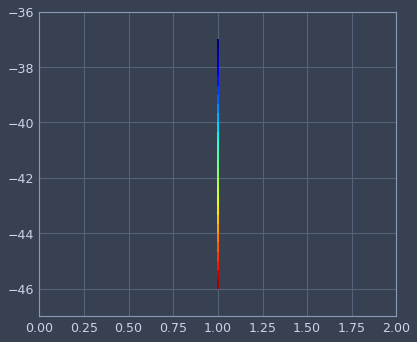

In [48]:
plot_gradient(MyAnalysis[0].results()[0][:,0], 
              MyAnalysis[0].results()[0][:,1])

In [39]:
MyAnalysis[0].results()[0]

array([[  1.,   2.,   0.],
       [  1.,   0.,   0.],
       [  1.,  -2.,   0.],
       [  1.,  -4.,   0.],
       [  1.,  -6.,   0.],
       [  1.,  -8.,   0.],
       [  1., -10.,   0.],
       [  1., -12.,   0.],
       [  1., -14.,   0.],
       [  1., -16.,   0.]])